# Homework 6. KNN - Handwritten digits

***Double Click here to edit this cell***

- Name: 서다원
- Student ID: 202001707
- Submission date: 2022.06.10

### We have 1797 handwritten digits of size 8x8 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [2]:
digits.target.shape

(1797,)

### Try with some handwritten images

Target is 0
Data is :

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

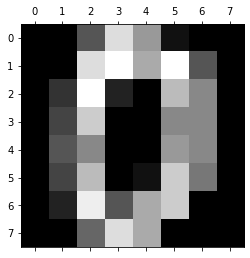

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt 

k = 0
print('Target is {}'.format(digits.target[k]))
print('Data is :\n')
print(digits.data[k].reshape(8,8))
plt.gray()
plt.matshow(digits.images[k]) 
plt.show() 

# Problem 1 (30 pts)

- We want to classify handwritten digits using **k nearest neighbor classifier**

## STEP 1

- import whatever you need
- you must set "random_state=0"" in "train_test_split"
- don't modify the random number seed (random_state)
- Split the data into training dataset (0.67 of the total data), test dataset(0.33 of the total data)

In [121]:
from sklearn import datasets, metrics
from sklearn.metrics import classification_report
import sklearn.neighbors as nb
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# YOUR CODE HERE

digits = datasets.load_digits()
X = digits.data
y = digits.target

#split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=0)


## STEP 2

- Use sklearn k nearest neighbor classifier to classify digits
- Print confusion matrix, classification report, accuracy
- This homework will be graded based on **accuracy**

In [125]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,  accuracy_score

knc = nb.KNeighborsClassifier()
knc.fit(X_train, y_train)
predictions =  knc.predict(X_test)
print("Confusion matrix:\n")
print(f"{metrics.confusion_matrix(y_test, predictions)}")
print('\n\nclassification_report : \n')

print(classification_report(y_test,predictions))
print("Accuracy = {:.2f}%".format(accuracy_score(y_test, predictions)*100))
#print("Accuracy = {:.2f}%".format(knc.score(X_test, y_test)*100))

Confusion matrix:

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 61  0  0  0  0  1  0  0]
 [ 0  0  1 54  0  0  0  0  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  5  0  1  0  0  1  0 60  0]
 [ 0  0  0  1  0  1  0  0  0 60]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.92      1.00      0.96        61
           2       0.98      0.98      0.98        62
           3       0.96      0.98      0.97        55
           4       1.00      0.98      0.99        50
           5       0.98      0.97      0.98        65
           6       0.97      1.00      0.99        67
           7       0.97      1.00      0.98        56
           8       1.00      0.90      0.94        67
           9       0.98      0.97      0.98        62

    accuracy              

My result:
```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy                           0.98       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.98      0.98       594

Average accuracy = 98.48%
```

## State-of-the-Art of MNIST classification: 99.79%

- https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
- MNIST dataset is much bigger dataset: 60,000 training images and 10,000 testing images

# Problem 2 (30 pts)

- If you choose any hyperparameters and you did any transformation in your data, justify your choice and transformation.
- The justification must be code, data, or plotted images, **not your guess!!!**
- This must be a longer code. 
- Use plotted image whenever possible.
- You may add as many cells as you want.
- To add a cell, insert->insert cell or click '+' button above in the notebook.
- you must set "random_state=0"" in "train_test_split", "TSNE" or on any functions based on random numbers

In [159]:
# ADD YOUR CELL
import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

np.random.seed(3)


img_rows = 28
img_cols = 28


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 6

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 7, 7, 64)          0         
                                              

In [160]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

yTest_original=np.argmax(y_test,axis=1)
yPred = np.argmax(model.predict(x_test), axis=-1)
#yPred_probabilities = model.predict(X_test)

print("Classification report \n=======================")
print(classification_report(y_true=yTest_original, y_pred=yPred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=yTest_original, y_pred=yPred))

print("Accuracy = {:.2f}%".format(score[1] *100))

Classification report 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion matrix 
[[ 978    0    0    0    0    0    1    0    0    1]
 [   0 1134    0    0    0    0    0    1    0    0]
 [   3    0 1023    0    0    0    0    6    0    0]
 [   0    0    1 1001    0    7    0    0

- This is my result. 

```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 61  1  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  0  0  0  0  0 65  0]
 [ 0  0  0  1  0  0  0  0  0 61]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      0.98      0.99        62
           3       0.96      1.00      0.98        55
           4       1.00      1.00      1.00        50
           5       1.00      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.97      0.98        67
           9       0.98      0.98      0.98        62

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594

Average accuracy = 98.99%
```

### Written justification for your hyperparameter choice and data transformation

keras로 CNN의 개념을 이용. 
hyperparameter 로는 pooling-layer parameter를 들 수 있다. 


## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_6_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills